# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 5

Do wykonania laboratorium można skorzystać z bibliotek/modułów:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)
- [pandas](https://pandas.pydata.org/)
- [collections](https://docs.python.org/3/library/collections.html)


### Zadanie 1

Wczytaj plik `english.10MB`
> Podpowiedź: Kodowanie `iso-8859-1`



In [1]:
with open('english.txt', encoding='iso-8859-1') as f:
    contents = f.readlines()
    f.close()
    
contents = [x.rstrip("\n") for x in contents]

### Zadanie 2
Zamień wszystkie litery na małe.


In [2]:
text = []
for i in contents:
    if i == '':
        pass
    else:
        i = i.lower()
        text.append(i)

### Zadanie 3
Znajdź unikalne litery (pomiń inne znaki) w tekście i dla każdej przypisz liczbę wystąpień, a następnie wyświetl histogram.

Pytanie: Jaka litera występuje najczęściej?

> Podpowiedź: `import string`


In [9]:
import pandas as pd
import string
import matplotlib.pyplot as plt
from collections import Counter

phrase = str()
for line in text:
    phrase += line

letters = string.ascii_lowercase
letter_dic ={}
for i in letters:
    counter = phrase.count(i)
    letter_dic[i] = counter
    

<BarContainer object of 26 artists>

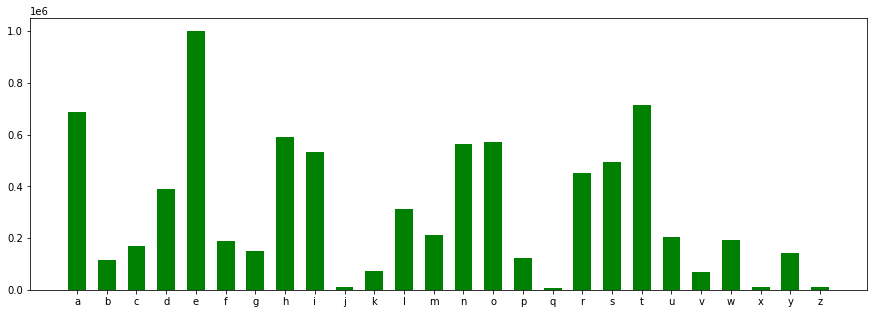

In [10]:
plt.figure(figsize=(15,5))
plt.bar(letter_dic.keys(), letter_dic.values(), width=.6, color='g')

### Zadanie 4

Napisz funkcję, która dla podanego prefiksu (ciąg liter, np. `th` to prefiks o długości 2) zwróci listę maksymalnie pięciu liter, które mają największe prawdopodobieństwo wystąpienia po nim.

```python
In : nast('th', s) # th - prefiks, s - tekst
Out: ['e', 'a', 'i', 'o', 'y']
```



In [23]:
def nast(start, phrase):
    lst = phrase.split(' ')
    dic = {}
    letters = string.ascii_lowercase
    
    for i in letters:
        dic[i] = 0
   
    for word in lst:
            try:
                if word.startswith(start):
                    wordNoStart = word.split(start,1)[1]
                    wordFirstLetter = str(wordNoStart[0])
                    if wordFirstLetter in dic:
                        dic[wordFirstLetter] += 1
            except IndexError:
                pass
    dic = {x:y for x,y in dic.items() if y!=0}
    k = Counter(dic)
    if len(k)>5:
        high = k.most_common(5)
    else:
        high = k.most_common(len(k))
    
    lst = []
    for i in high:
        lst.append(i[0])
       
    return lst


nast('th',phrase)

['e', 'a', 'i', 'o', 'y']

### Zadanie 5

Napisz kod, który wczytuje kolejne znaki od użytkownika i podpowiada następne możliwe litery (maksymalnie pięć). Wykorzystaj funkcję zaimplementowaną w poprzednim zadaniu.

> Podpowiedź: Możesz wykorzystać funkcję `input()` do wczytywania znaków.

Przykład działania:
```
Nacisnij <ENTER> aby zakonczyc.
Podaj litere: f
Podaj kolejną literę (możliwe: ['o', 'a', 'r', 'e', 'i']): fo
Podaj kolejną literę (możliwe: ['r', 'u', 'l', 'o', 'x']): for
Podaj kolejną literę (możliwe: ['e', 't', 'm', 'g', 'c']): fore
Podaj kolejną literę (możliwe: ['s', 'h', 'i', 'g', 'v']): fores
Podaj kolejną literę (możliwe: ['t', 'a', 'e', 'i', 'k']): forest
Podaj kolejną literę (możliwe: ['s', 'a']): forests
```

In [25]:
x = input('Podaj litere: ')
while len(nast(x,phrase))>0:
    x = x + input('Podaj kolejną literę (możliwe: ' + str(nast(x,phrase))+': '+x)

Podaj litere: t
Podaj kolejną literę (możliwe: ['h', 'o', 'r', 'i', 'a']: th
Podaj kolejną literę (możliwe: ['e', 'a', 'i', 'o', 'y']: the
Podaj kolejną literę (możliwe: ['y', 'm', 'e', 'n', 'r']: they
Podaj kolejną literę (możliwe: ['s', 'a', 'w', 'o', 'r']: theys
Podaj kolejną literę (możliwe: ['a', 'e', 'h', 'p', 'u']: theysa
Podaj kolejną literę (możliwe: ['i', 'w', 't', 'l', 'y']: theysai
Podaj kolejną literę (możliwe: ['d']: theysaid


### Zadanie 6

Wykonaj zadanie podobne do zad. 6, ale na poziomie słów. Dla ułatwienia słowa można wybierać z listy za pomocą liczb 1-5.

In [6]:
# <UZUPEŁNIJ>